In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Load the data.

Transaction data frame contain detail of all transacion.
Fraud data frame contain a list of fraudster
Users data frame contain information of the user.

In [2]:
transaction = pd.read_csv("../data/train_transactions.csv",index_col = 0)
fraud = pd.read_csv("../data/train_fraudsters.csv",index_col = 0)
users = pd.read_csv("../data/train_users.csv",index_col = 0)
rate = pd.read_csv("../data/fx_rates.csv")
transaction.Fraud = transaction.Fraud.apply(lambda x: 0 if x== "0" else 1)

## Transaction dataframe

In [ ]:
transaction.head()

The column State looks like leakage, will not use it in model

In [ ]:
print(transaction.groupby("USER_ID").median().Fraud.value_counts())

print(transaction.groupby("USER_ID").median().Fraud.value_counts() / len(transaction.groupby("USER_ID").median().Fraud))
      
      
      
      
      

### Missing Data

In [ ]:
transaction.info()

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(transaction.isna(),cbar = False)
plt.savefig("../img/missing.png")

### Numberical features

MERCHANT_CATEGORY has alot of missing data, MERCHANT_COUNTRY has about 30% missing data as well.

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(transaction.Fraud,transaction.AMOUNT)
plt.savefig("../img/Amount.png")

Look at the box plot of the transaction amount, it looks like there is a lot of outliers.

### Catergorical Features

In [ ]:
fraudster = transaction[transaction.Fraud == 1]
normal = transaction[transaction.Fraud == 0]

In [ ]:
def check_percentage(column):
    """
    Return the percentage of catergorical variable in each column for fraud trasaction and regular transaction
    input: 
    """
    a = fraudster[column].value_counts().head(6) /len(fraudster)
    b = normal[column].value_counts().head(6) /len(normal)
    
    print("Fraudster:\n",a)
    print("\n")
    print("Not_Fraud:\n",b)
    fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(12,6))
    ax[0].bar(a.index,a.values)
    ax[0].set_title("Fraud {} Distrubution".format(column))
    ax[0].set_xticklabels(a.index, rotation=45)
    ax[1].bar(b.index,b.values)
    ax[1].set_title("Non Fraud {} Distrubution".format(column))
    ax[1].set_xticklabels(b.index, rotation=45)
    plt.tight_layout()
    plt.savefig("../img/{}".format(column))

In [ ]:
check_percentage("CURRENCY")

Fraudster has over 90% transaction is in GBP

In [ ]:
check_percentage("MERCHANT_CATEGORY")

For Fraudster, atm transaction percentage is more than 4 times as none fraud transaction.

In [ ]:
check_percentage("MERCHANT_COUNTRY")

For Fraudster, Great Britan percentage is more than 2 times as none fraud transaction.

In [ ]:
check_percentage("ENTRY_METHOD")

For Fraudster, manu percentage is almost 2 times as none fraud transaction.

In [ ]:
check_percentage("TYPE")

For Fraudster, bank transfer percentage is almost 4 times as none fraud transaction.

In [ ]:
check_percentage("SOURCE")

For Fraudster, minos percentage is more than 15 times as none fraud transaction.

### Users Data Set

In [ ]:
users.head()

In [ ]:
users.PHONE_COUNTRY = users.PHONE_COUNTRY.apply(lambda x: x.split("||"))
users["phone"] = users.PHONE_COUNTRY.apply(lambda x: len(x))
users = pd.merge(users,fraud,how="left",left_on="ID",right_on = "user_id")
users["is_fraud"] = users.user_id.apply(lambda x:0 if x is np.nan else 1)

covert phone country column to a list, create column phone which is the count of element in the phone country list

merge with the fraud dataframe to identify whcich user is fraud

In [ ]:
users[users.is_fraud == 1].KYC.value_counts()/ len(users[users.is_fraud == 1])

In [ ]:
users[users.is_fraud == 0].KYC.value_counts() / len(users[users.is_fraud == 0])

Fraud user tend to have KYC of failed and pending,and no nearly no None, which is the status of identification process.

In [ ]:
users[users.is_fraud == 1].phone.value_counts()/ len(users[users.is_fraud == 1])

In [ ]:
users[users.is_fraud == 0].phone.value_counts() / len(users[users.is_fraud == 0])

Fraud user tend to have length of phone to be 4.

In [ ]:
fraud = users[users.is_fraud == 1]
not_fraud = users[users.is_fraud == 0]

In [ ]:
sns.distplot((pd.to_datetime(users.CREATED_DATE).max() - pd.to_datetime(fraud.CREATED_DATE)).dt.days);
plt.title("Fraud User Account Age")
plt.savefig("")

In [ ]:
sns.distplot((pd.to_datetime(users.CREATED_DATE).max() - pd.to_datetime(not_fraud.CREATED_DATE)).dt.days);
plt.title("Non Fraud User Account Age")

For both group, user account age seems to have similar distribution, user that are not fraud had a fatter tail.

In [ ]:
fig, axes =plt.subplots(1,2,figsize=(12,6))
sns.distplot((pd.to_datetime(users.CREATED_DATE).max() - pd.to_datetime(fraud.CREATED_DATE)).dt.days,ax =axes[0])
axes[0].set_title("Fraud User Account Age")
sns.distplot((pd.to_datetime(users.CREATED_DATE).max() - pd.to_datetime(not_fraud.CREATED_DATE)).dt.days,ax= axes[1]);
axes[1].set_title("Non Fraud User Account Age")
plt.savefig("../img/Account Age")

In [ ]:
def check_percentage(column):
    """
    Return the percentage of catergorical variable in each column for fraud trasaction and regular transaction
    input: 
    """
    a = fraudster[column].value_counts().head(6) /len(fraudster)
    b = normal[column].value_counts().head(6) /len(normal)
    
#     print("Fraudster:\n",a)
#     print("\n")
#     print("Not_Fraud:\n",b)
#     fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(12,6))
    plt.bar(a.index,a.values,label= "Fraud",alpha =0.8)
    plt.title("Fraud {} Distrubution".format(column))
#     plt.set_xticklabels(a.index, rotation=45)
    plt.bar(b.index,b.values,alpha = 0.8,label = "Not Fraud")
    plt.legend()
#     ax[1].set_title("Non Fraud {} Distrubution".format(column))
#     ax[1].set_xticklabels(b.index, rotation=45)
#     plt.tight_layout()
#     plt.savefig("../img/{}".format(column))

In [ ]:
check_percentage("SOURCE")

In [ ]:
sns.bar

In [3]:
transaction.SOURCE.value_counts()

GAIA        483831
HERA        116081
INTERNAL     56407
MINOS        11056
LETO          6935
CRONUS        6139
NYX           5178
OPHION        1278
LIMOS          961
APOLLO         784
BRIZO            1
Name: SOURCE, dtype: int64

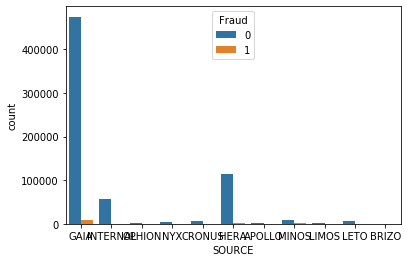

In [4]:
sns.countplot(transaction.SOURCE,hue = transaction.Fraud)

In [7]:
sns.barplot(transaction.SOURCE.value_counts().index / len(transaction)
            ,transaction.SOURCE.value_counts().values)

TypeError: cannot perform __truediv__ with this index type: Index

In [43]:
a = transaction[transaction.Fraud == 0].SOURCE.value_counts().head(6) /len(transaction[transaction.Fraud == 0])
b = transaction[transaction.Fraud == 1].SOURCE.value_counts().head(6) /len(transaction[transaction.Fraud == 1])

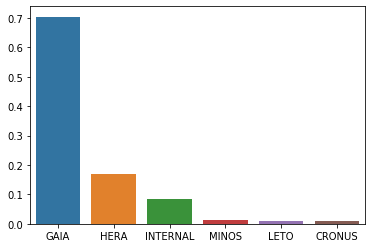

In [22]:
sns.barplot(a.index,a.values)

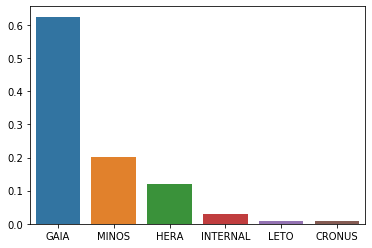

In [23]:
sns.barplot(b.index,b.values)

In [25]:
pd.concat([a,b])

GAIA        0.704258
HERA        0.169606
INTERNAL    0.083030
MINOS       0.012083
LETO        0.010079
CRONUS      0.008933
GAIA        0.624699
MINOS       0.200165
HERA        0.120195
INTERNAL    0.029980
LETO        0.009695
CRONUS      0.008045
Name: SOURCE, dtype: float64

In [26]:
a["fraud"] =0

In [27]:
b["fraud"] = 1

GAIA        0.704258
HERA        0.169606
INTERNAL    0.083030
MINOS       0.012083
LETO        0.010079
CRONUS      0.008933
fraud       0.000000
Name: SOURCE, dtype: float64

In [46]:
c = pd.DataFrame(a.values,a.index).reset_index()
d = pd.DataFrame(b.values,b.index).reset_index()

In [61]:
c["Fraud"] =0
d["Fraud"] =1

In [57]:
d = pd.DataFrame(b.values,b.index).reset_index()

In [64]:
e =pd.concat([c.reset_index(),d])

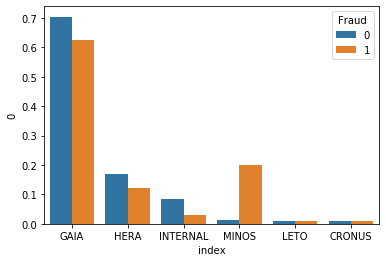

In [70]:
sns.barplot(e["index"],e[0],hue = e.Fraud)

In [83]:
def side_compare(column):
    plt.figure(figsize=(10,6))
    not_fraud = transaction[transaction.Fraud == 0][column].value_counts().head(6) /len(transaction[transaction.Fraud == 0])
    fraud = transaction[transaction.Fraud == 1][column].value_counts().head(6) /len(transaction[transaction.Fraud == 1])
    c = pd.DataFrame(not_fraud.values,not_fraud.index).reset_index()
    d = pd.DataFrame(fraud.values,fraud.index).reset_index()
    c["Fraud"] ="Not Fraud"
    d["Fraud"] ="Fraud"
    e =pd.concat([c,d])
    sns.barplot(e["index"],e[0],hue = e.Fraud)
    plt.title("{} Distrubution".format(column))
    

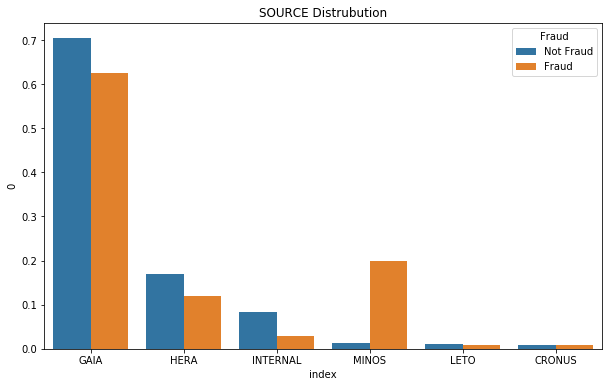

In [84]:
side_compare("SOURCE")
plt.savefig("../img/SOURCE_COM.png")

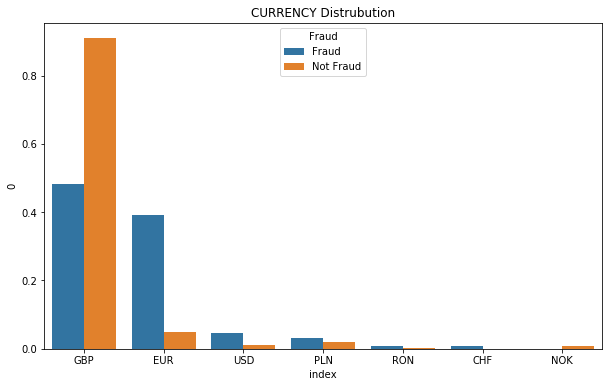

In [80]:
side_compare("CURRENCY")

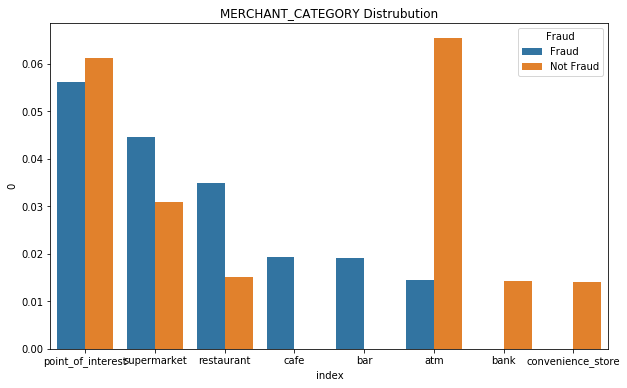

In [81]:
side_compare("MERCHANT_CATEGORY")
plt.savefig